# Car Recommendation

By analyzing Cars data by millage and Price recommend the similar car to customer by Unsupervised Clustering model

# 1.Fetch data

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")
import pandas as pd 
A=pd.read_csv("c:/users/ullah/desktop/Cars93.csv")
A.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


# 2.standarize the data 

In [3]:
B=A[["Price","MPG.city"]]
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
C=pd.DataFrame(mm.fit_transform(B),columns=["Price","MPG.city"])

In [5]:
C.head()

,Price,MPG.city
0,0.155963,0.322581
1,0.486239,0.096774
2,0.398165,0.161290
3,0.555963,0.129032
4,0.414679,0.225806


# 3.deciding the requried no. clusters

In [6]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=10)
model=km.fit(C)
model.labels_

array([9, 1, 7, 1, 7, 0, 6, 4, 7, 1, 1, 9, 9, 6, 0, 4, 4, 4, 1, 6, 0, 7,
       3, 9, 0, 4, 0, 7, 3, 6, 3, 9, 9, 0, 9, 4, 6, 4, 2, 3, 0, 2, 0, 3,
       9, 9, 0, 8, 7, 1, 1, 1, 3, 3, 9, 4, 1, 7, 5, 0, 6, 3, 7, 3, 0, 4,
       6, 9, 0, 4, 6, 0, 3, 9, 6, 6, 7, 7, 3, 3, 9, 0, 2, 3, 0, 0, 4, 9,
       4, 6, 4, 6, 7])

In [7]:
Q=pd.DataFrame(model.labels_,columns=["Cluster"])
Q.groupby(by="Cluster")["Cluster"].count()

Cluster
0    16
1     9
2     3
3    13
4    13
5     1
6    12
7    11
8     1
9    14
Name: Cluster, dtype: int64

In [9]:
K=range(2,20,1)
WCSS=[]
for i in K:
    km=KMeans(n_clusters=i)
    model=km.fit(C)
    WCSS.append(model.inertia_)

In [10]:
WCSS

[2.984556204508492,
 1.7604339512829656,
 1.2111248917250903,
 0.8106745220475998,
 0.5492495025231656,
 0.4395561399141754,
 0.3679669327296375,
 0.320333513456698,
 0.27734691196690314,
 0.25664871040666776,
 0.22626609554700047,
 0.20009691474635077,
 0.17301192196064544,
 0.16211389658318426,
 0.13585971250089338,
 0.13529897474596192,
 0.11833218759864941,
 0.10484533222519576]

Text(0.5, 1.0, 'Elbow curve car data')

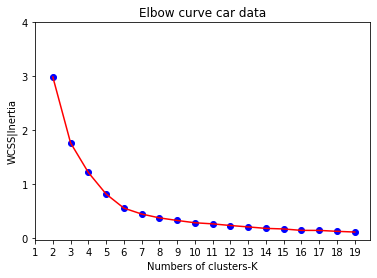

In [18]:
import matplotlib.pyplot as plt
plt.scatter(K,WCSS,c="blue")
plt.plot(K,WCSS,c="red")
plt.xlabel("Numbers of clusters-K")
plt.ylabel("WCSS|Inertia")
plt.xticks(range(1,20,1))
plt.yticks(range(0,5,1))
plt.title("Elbow curve car data")

no. of clusters:-6

# 4.Make new cluster model

In [34]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=6)
model=km.fit(C)
model.labels_

array([0, 5, 5, 5, 5, 0, 2, 2, 2, 5, 5, 0, 0, 2, 0, 2, 2, 2, 5, 2, 0, 5,
       3, 0, 0, 2, 0, 2, 3, 2, 3, 0, 0, 0, 0, 2, 2, 2, 1, 3, 0, 1, 0, 3,
       0, 3, 0, 4, 5, 5, 5, 5, 3, 3, 0, 2, 5, 5, 4, 0, 2, 3, 2, 3, 0, 2,
       2, 0, 0, 2, 2, 0, 3, 0, 2, 2, 2, 5, 3, 3, 0, 0, 1, 3, 0, 0, 2, 0,
       2, 2, 2, 2, 2])

Text(0, 0.5, 'Mileage')

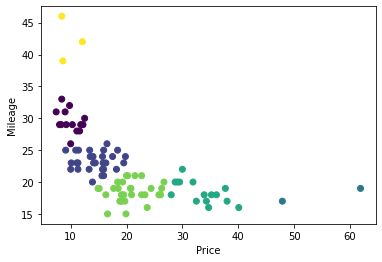

In [20]:
import matplotlib.pyplot as plt
plt.scatter(B.Price,B['MPG.city'],c=model.labels_)
plt.xlabel("Price")
plt.ylabel("Mileage")

In [21]:
model.cluster_centers_

array([[0.04718218, 0.46774194],
       [0.12900981, 0.26585095],
       [0.87155963, 0.09677419],
       [0.47547401, 0.10967742],
       [0.24201835, 0.11182796],
       [0.04220183, 0.88172043]])

In [22]:
E=pd.DataFrame(mm.inverse_transform(model.cluster_centers_),columns=["X","Y"])

In [23]:
E

,X,Y
0,9.971429,29.500000
1,14.431034,23.241379
2,54.900000,18.000000
3,33.313333,18.400000
4,20.590000,18.466667
5,9.700000,42.333333


In [28]:
B["X"]=E.X
B["Y"]=E.Y
B["Clusters"]=model.labels_
B["Make"]=A.Make

In [29]:
B.head()

,Price,MPG.city,X,Y,Clusters,Make
0,15.9,25,9.971429,29.500000,1,Acura Integra
1,33.9,18,14.431034,23.241379,3,Acura Legend
2,29.1,20,54.900000,18.000000,3,Audi 90
3,37.7,19,33.313333,18.400000,3,Audi 100
4,30.0,22,20.590000,18.466667,3,BMW 535i


Text(0, 0.5, 'Millage in city')

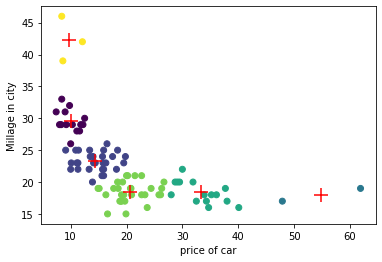

In [30]:
plt.scatter(B.Price,B["MPG.city"],c=B.Clusters)
plt.scatter(E.X,E.Y,c="red",marker="+",s=200)
plt.xlabel("price of car")
plt.ylabel("Millage in city")

# 5.Write a code for searching a similar car from clusterd group

In [ ]:
w=input("Enter the car to find simialr car: ")
cluster_no_of_given_car=B[B.Make==w][["Clusters"]].values[0][0]
print("these are the cars similars the one you like:")
for i in B[B.Clusters==cluster_no_of_given_car].Make:
    print(i)